<a href="https://colab.research.google.com/github/Fatemekm98/RL-exersice1/blob/RL-exersice2/RL2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Check the versions of libraries
# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn

Python: 3.9.16 (main, Dec  7 2022, 01:11:51) 
[GCC 9.4.0]
scipy: 1.10.1
numpy: 1.22.4
matplotlib: 3.5.3
pandas: 1.3.5


In [ ]:
# Load libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from turtle import pd


In [ ]:
dataset = read_csv(r"sonar.all-data")

In [ ]:
# head
print(dataset.shape)

(207, 61)


In [ ]:
# head
print(dataset.head())

   0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109  \
0  0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
1  0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
2  0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
3  0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
4  0.0286  0.0453  0.0277  0.0174  0.0384  0.0990  0.1201  0.1833  0.2105   

   0.2111  ...  0.0027  0.0065  0.0159  0.0072  0.0167  0.0180  0.0084  \
0  0.2872  ...  0.0084  0.0089  0.0048  0.0094  0.0191  0.0140  0.0049   
1  0.6194  ...  0.0232  0.0166  0.0095  0.0180  0.0244  0.0316  0.0164   
2  0.1264  ...  0.0121  0.0036  0.0150  0.0085  0.0073  0.0050  0.0044   
3  0.4459  ...  0.0031  0.0054  0.0105  0.0110  0.0015  0.0072  0.0048   
4  0.3039  ...  0.0045  0.0014  0.0038  0.0013  0.0089  0.0057  0.0027   

   0.0090  0.0032  R  
0  0.0052  0.0044  R  
1  0.0095  0.0078  R  
2  0.0040  0.0117  R  


In [ ]:
# descriptions
print(dataset.describe())

           0.0200      0.0371      0.0428      0.0207      0.0954      0.0986  \
count  207.000000  207.000000  207.000000  207.000000  207.000000  207.000000   
mean     0.029208    0.038443    0.043837    0.054053    0.075105    0.104599   
std      0.023038    0.033040    0.038521    0.046583    0.055669    0.059247   
min      0.001500    0.000600    0.001500    0.005800    0.006700    0.010200   
25%      0.013300    0.016400    0.018900    0.024450    0.037700    0.066950   
50%      0.022800    0.030800    0.034200    0.044100    0.062000    0.092100   
75%      0.035800    0.048100    0.058200    0.065700    0.101050    0.134150   
max      0.137100    0.233900    0.305900    0.426400    0.401000    0.382300   

           0.1539      0.1601      0.3109      0.2111  ...      0.0232  \
count  207.000000  207.000000  207.000000  207.000000  ...  207.000000   
mean     0.121591    0.134677    0.177361    0.208245  ...    0.016034   
std      0.061897    0.085340    0.118311    0.1

In [ ]:
# class distribution
print(dataset.groupby('R').size())

R
M    111
R     96
dtype: int64


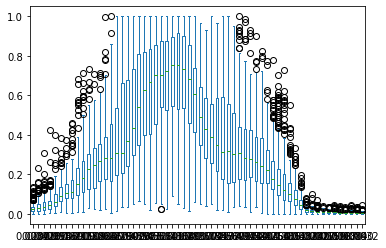

In [ ]:
# box and whisker plots
dataset.plot(kind='box', subplots=False, layout=(2,2), sharex=False, sharey=False)
pyplot.show()

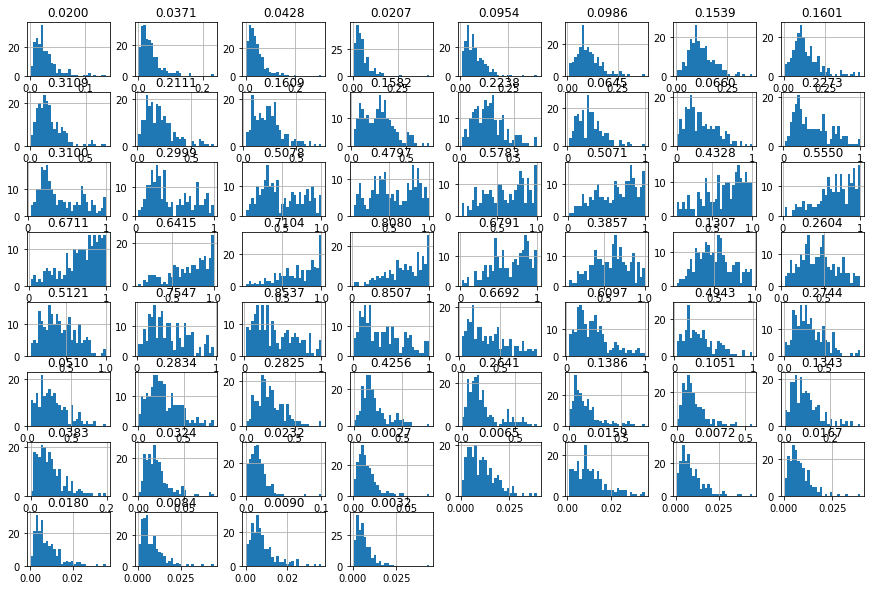

In [ ]:
# histograms
dataset.hist(bins=30, figsize=(15, 10))

pyplot.show()

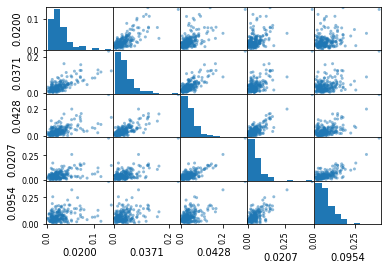

In [ ]:
# scatter plot matrix
scatter_matrix(dataset.iloc[:, 0:5])
pyplot.show()

In [ ]:
# Split-out validation dataset
array = dataset.values
x = array[:,0:4]
y = array[:,4]
x_train, x_validation, y_train, y_validation = train_test_split(x, y, test_size=0.20, random_state=1)

In [ ]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.940909 (0.075286)
LDA: 0.975000 (0.053359)
KNN: 0.958333 (0.055902)
CART: 0.957576 (0.056509)
NB: 0.958333 (0.076830)
SVM: 0.975000 (0.053359)


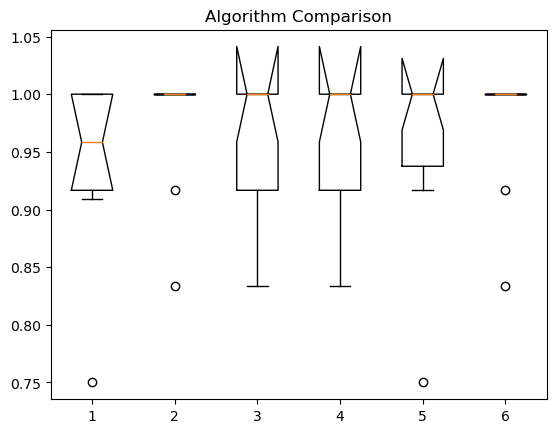

In [ ]:
# Compare Algorithms
pyplot.boxplot(results, names)
pyplot.title('Algorithm Comparison')
pyplot.show()